## Lab Assignment 2 - Emilio Rimini
200007278
https://github.com/emiliorimini/PY4SA23_Assignment.git

### Task 1 

The below code tests whether a number is divisible by 3 and displays a message accordingly. The number 29 has been used an example and displays the "is not divisible by 3" message when ran

In [1]:
number = 29
if number % 3 == 0:
    print(f"{number} is divisible by 3")
else:
    print(f"{number} is not divisible by 3")



29 is not divisible by 3


### Task 2

The below code details whether a fruit is acceptable or not and displays a message accordingly. A kiwi has been used an example and displays the "is acceptable" message when ran

In [44]:
fruits = ["apple", "orange", "pear", "kiwi", "strawberry"]
tested_fruit = input("Type Fruit Name: ")
if tested_fruit.lower() in fruits:
    print(f"{tested_fruit.upper()} is acceptable.")
else:
    print(f"{tested_fruit.upper()} is not acceptable.")


Type Fruit Name:  kiwi


KIWI is acceptable.


### Task 3 

The below is a function that can calculate the distance between two coordinates using the haversine formula. Two example co-ordinates have been used to measure the distance from the Arsenal stadium in London to St Andrews and the distance is printed as just over 560km.

In [47]:
import math
def haversine(coord1, coord2):
    lon1, lat1, lon2, lat2 = map(math.radians, [coord1[1], coord1[0], coord2[1], coord2[0]])

    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    r = 6371 #
    return c * r

coord1 = [51.5549, 0.1084]  
coord2 = [56.3398, 2.7967]  
distance = haversine(coord1, coord2)
print(distance) 


560.2772670429387




## Pandas and NumPy

### Q1: How many trees are of the Quercus or Acer genus? - 

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('portland_park_trees.csv')
mask = df['Genus_spec'].str.contains('Quercus|Acer', case=False)
count = mask.sum()
print(f'The number of times a Quercus or Acer tree appears is: {count}')


The number of times a Quercus or Acer tree appears is: 5994


### Q2: How many trees are of the Quercus or Acer genus and have a DBH larger than 50 inches?

In [5]:
mask = df['Genus_spec'].str.contains('Quercus|Acer', case:=False) & (df['DBH'] > 50)
count = mask.sum()
print(f'The number of trees of the Quercus or Acer genus with DBH > 50 inches is: {count}')

The number of trees of the Quercus or Acer genus with DBH > 50 inches is: 142


### Q3: Which genus has the highest mean DBH of the following genera: Quercus, Acer, or Fraxinus?

In [6]:
mask = df['Genus_spec'].str.contains('Quercus|Acer|Fraxinus', case=False)
filtered_df = df[mask]
mean_dbh_by_genus = filtered_df.groupby('Genus_spec')['DBH'].mean()
print(mean_dbh_by_genus)
highest_mean_dbh_genus = mean_dbh_by_genus.idxmax()
print(f"The genus with the highest mean DBH is {highest_mean_dbh_genus}")

Genus_spec
Acer buergerianum                11.980000
Acer campestre                   17.901471
Acer circinatum                   5.290635
Acer davidii                      8.950000
Acer grandidentatum 'Schmidt'     8.700000
Acer griseum                      5.375000
Acer heldreichii                 11.600000
Acer japonicum                    5.225000
Acer macrophyllum                29.281755
Acer monspessulanum               7.000000
Acer negundo                     16.450000
Acer palmatum                     7.586364
Acer platanoides                 20.340566
Acer pseudoplatanus              18.826303
Acer rubrum                      14.641914
Acer rufinerve                    0.200000
Acer saccharinum                 33.642308
Acer saccharum                   19.008497
Acer tataricum ssp. ginnala      11.631250
Acer x freemanii                 13.686957
Fraxinus americana                9.130075
Fraxinus angustifolia            13.712821
Fraxinus excelsior               14.000000


### Q4: How many different species of trees are recorded in the Acer genus?

In [7]:
mask = df['Genus_spec'].str.contains('Acer', case=False)
acer_df = df[mask]
num_species = acer_df['Species'].nunique()
print(f"There are {num_species} different species of trees recorded in the Acer genus.")

There are 21 different species of trees recorded in the Acer genus.


### Q5: using the world_cities.csv:
• Calculate a new column named "pop_M" (population in millions), by transforming the "pop" (population) column.
• Remove the original "pop" column.
• Choose/subset a city that starts with the same letter as your first name (for example,
"Mexico City" if your first name is Michael).
• Subset the five biggest (i.e., largest population sizes) cities from the country where your
selected city is.
• Print the result.
• Make sure you write the scripts in different code cells where you describe the process.

The below code addresses the first bullet point, initially reading the new csv, then creating a new column displaying the population in millions. I added a print function to test whether the new column had been correctly created.

In [8]:
df = pd.read_csv('world_cities.csv')
df['pop_M'] = df['pop'] / 1000000
print(df.head())

                 city    country    pop    lat    lon  capital     pop_M
0  'Abasan al-Jadidah  Palestine   5629  31.31  34.34        0  0.005629
1  'Abasan al-Kabirah  Palestine  18999  31.32  34.35        0  0.018999
2        'Abdul Hakim   Pakistan  47788  30.55  72.11        0  0.047788
3  'Abdullah-as-Salam     Kuwait  21817  29.36  47.98        0  0.021817
4               'Abud  Palestine   2456  32.03  35.07        0  0.002456


The below code removes the oringial population (pop) column

In [9]:
df.drop('pop', axis=1, inplace=True)

The below code chooses a city with the same first letter as my name

In [10]:
my_city = df.loc[df['city'].str.startswith('E')].iloc[0]
print(f"Selected city: {my_city['city']}, {my_city['country']}")

Selected city: Eagan, USA


The below code subsets and prints the five largest cities in my selected country, the USA

In [11]:
biggest_cities = df.loc[df['country'] == my_city['country']].nlargest(5, 'pop_M')
print(f"Five biggest cities in {my_city['country']} are:")
print(biggest_cities[['city', 'pop_M']])

Five biggest cities in USA are:
              city     pop_M
25877     New York  8.124427
21435  Los Angeles  3.911500
7366       Chicago  2.830144
14769      Houston  2.043005
28856      Phoenix  1.450884


### Phython Data Visualisation
### Graph 1


The below code begins with importing the matplotlib needed to create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis and tree height mapped to the y-axis

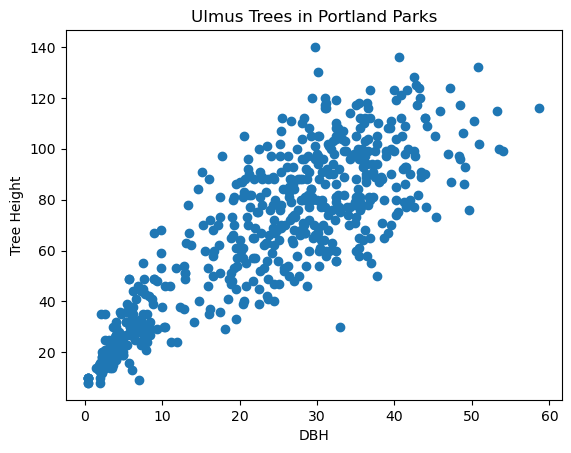

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('portland_park_trees.csv')
ulmus_df = df[df['Genus'] == 'Ulmus']
plt.scatter(ulmus_df['DBH'], ulmus_df['TreeHeight'])
plt.xlabel('DBH')
plt.ylabel('Tree Height')
plt.title('Ulmus Trees in Portland Parks')
plt.show()

### Graph 2

Using Seaborn the below code creates a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis and tree height mapped to the y-axis

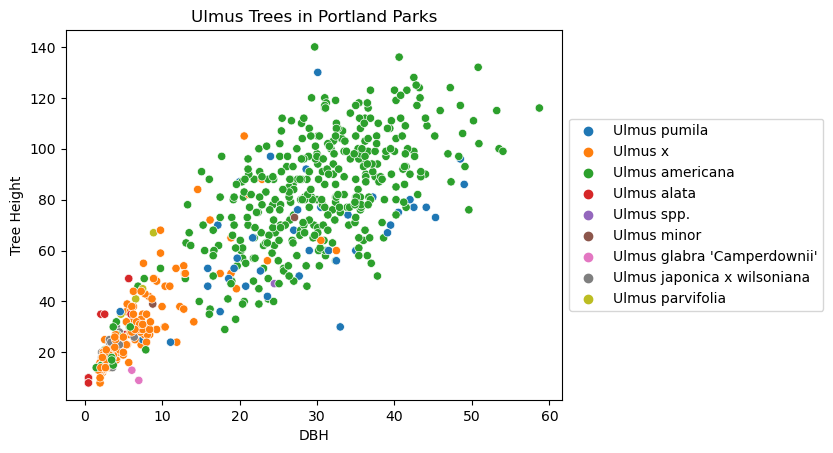

In [48]:
import seaborn as sns
df = pd.read_csv('portland_park_trees.csv')
ulmus_df = df[df['Genus'] == 'Ulmus']
sns.scatterplot(data=ulmus_df, x='DBH', y='TreeHeight', hue='Genus_spec')
plt.xlabel('DBH')
plt.ylabel('Tree Height')
plt.title('Ulmus Trees in Portland Parks')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Graph 3

The below code creates a boxplot of DBH for just the Ulmus genus differentiated by species

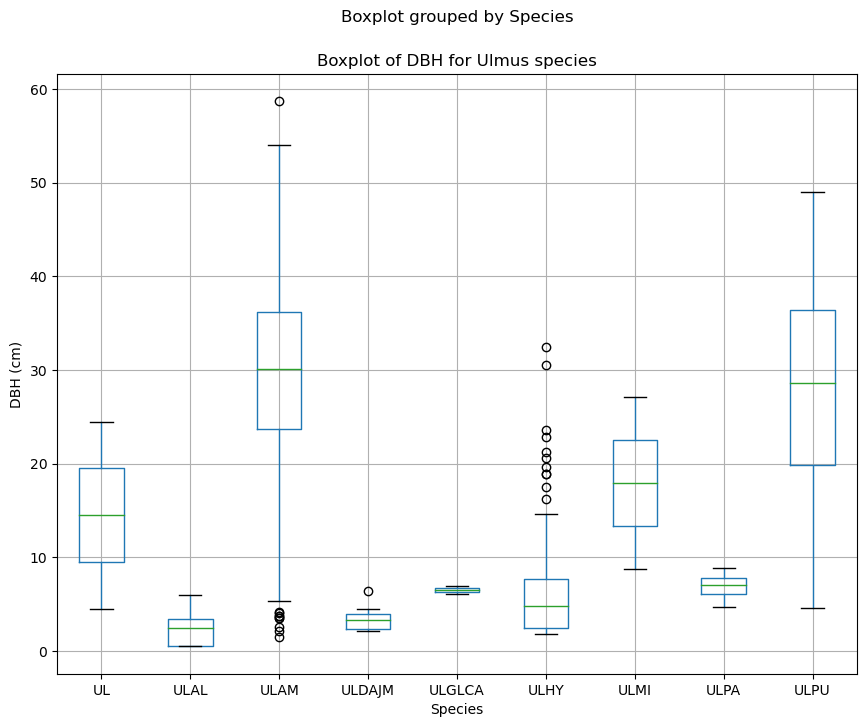

In [30]:
ulmus_df.boxplot(column='DBH', by='Species', figsize=(10, 8))
plt.title('Boxplot of DBH for Ulmus species')
plt.xlabel('Species')
plt.ylabel('DBH (cm)')
plt.show()

### Graph 4

The below code combines the two figures from Graph 1 and Graph 3 into a single figure

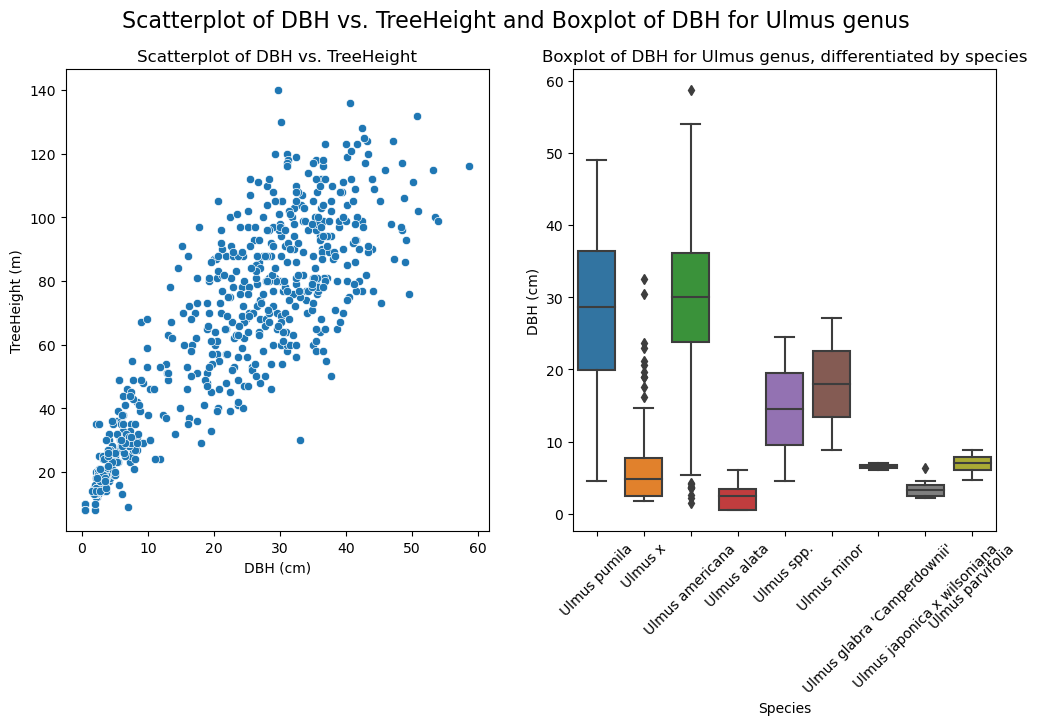

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data=ulmus_df, x='DBH', y='TreeHeight', ax=axs[0])
sns.boxplot(data=ulmus_df, x='Genus_spec', y='DBH', ax=axs[1])
fig.suptitle('Scatterplot of DBH vs. TreeHeight and Boxplot of DBH for Ulmus genus', fontsize=16)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
axs[0].set_title('Scatterplot of DBH vs. TreeHeight')
axs[1].set_title('Boxplot of DBH for Ulmus genus, differentiated by species')
axs[0].set_xlabel('DBH (cm)')
axs[0].set_ylabel('TreeHeight (m)')
axs[1].set_xlabel('Species')
axs[1].set_ylabel('DBH (cm)')
plt.show()

### Python GeoPandas

### Task 1

The below code reads my selected dataset on Deer Management Groups in Scotland as a GeoPandas DataFrame by importing geopandas

In [31]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas
import geopandas as gpd
gdf = gpd.read_file("DMG_SCOTLAND.shp")

### Task 2

The below code plots the first and last five records


<AxesSubplot: >

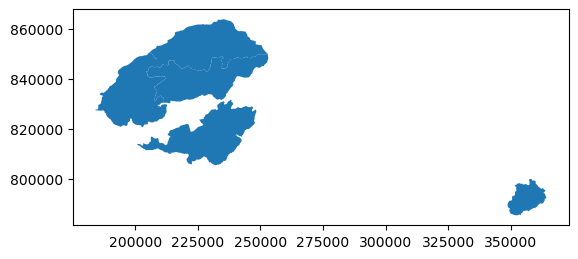

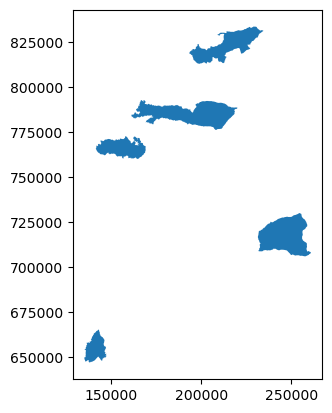

In [32]:
gdf.head(5).plot()
gdf.tail(5).plot()

### Task 3

The below code creates a map of the entire dataset. I was not able to create a tooltip despite much perserverance. 

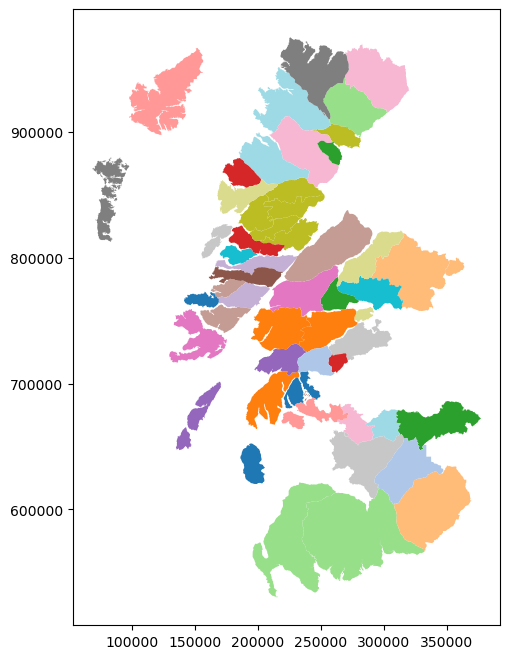

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt
gdf = gpd.read_file('DMG_SCOTLAND.shp')
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(column='DMG_CODE', cmap='tab20', legend=False, ax=ax)
plt.show()


### Task 4

What is the co-ordinate reference system of the selected data set?

In [34]:
print(gdf.crs)

EPSG:27700


### Task 5

How many features does the selected dataset contain?

In [35]:
print(len(gdf))

58


### Task 6

The below code defines a sub-setting criterion to create a new geopandas dataframe filtering the selected dataset based on a categorical attribute, the region South Ross.

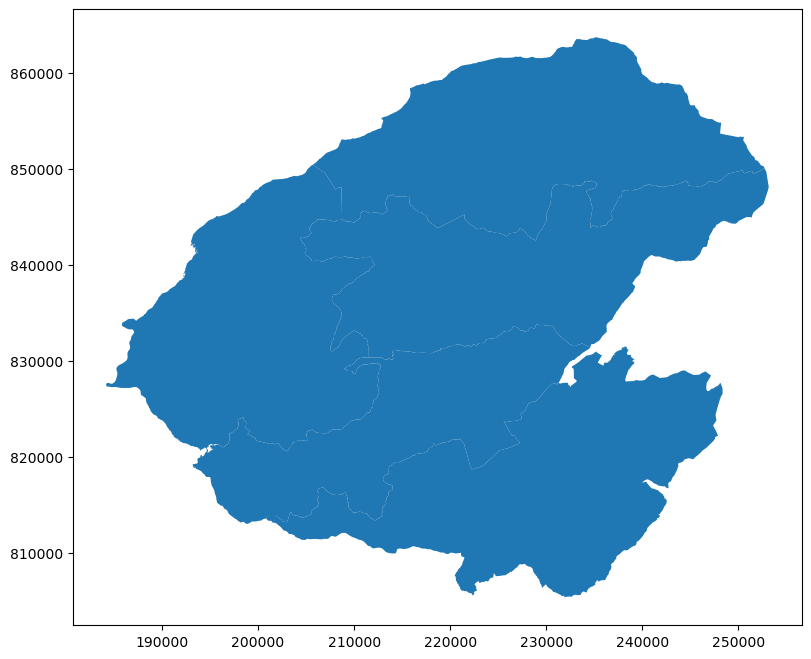

In [37]:
gdf_subset = gdf[gdf['SUB_GROUP'] == 'South Ross']
fig, ax = plt.subplots(figsize=(12, 8))
gdf_subset.plot(column='DMG_CODE', cmap='tab20', legend=False, ax=ax)
plt.show()

### Task 7

The below code defines a sub-setting criterion to create a new geopandas dataframe filtering the selected dataset based on a numerical attribute, the only available was the Deer Management ID reference filtered to anything greater than 6.9

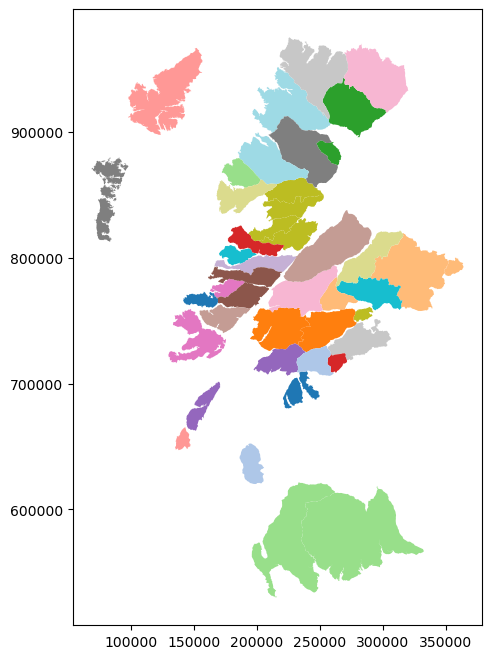

In [38]:
gdf_subset = gdf[gdf['ID'] > 6.9]
fig, ax = plt.subplots(figsize=(12, 8))
gdf_subset.plot(column='DMG_CODE', cmap='tab20', legend=False, ax=ax)
plt.show()

### Task 8

The below code plots the filtered geopandas dataframe using the numerical attribute to create a choropleth map.

Text(0.5, 1.0, 'DMG_SCOTLAND: ID > 6.9')

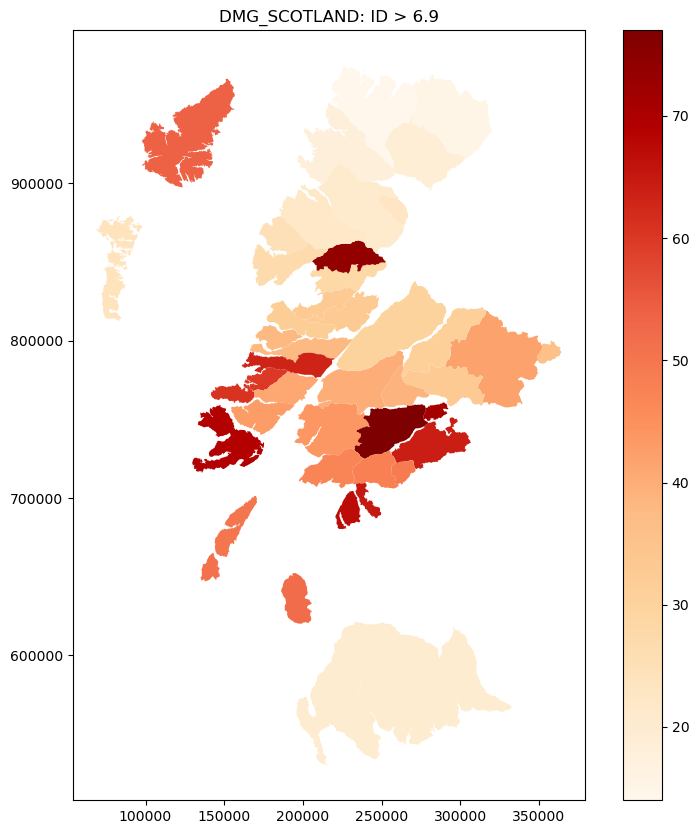

In [23]:
import contextily as ctx
ax = gdf_subset.plot(column='ID', cmap='OrRd', legend=True, figsize=(10, 10))
ax.set_title('DMG_SCOTLAND: ID > 6.9')

## Python Rasterio

### Task 1

Read the file as a rasterio

In [39]:
import rasterio
with rasterio.open('elev.tif') as dataset:
    crs = dataset.crs

### Task 2

The below defines the Co-ordinate referencing system used

In [41]:
import rasterio.plot as plot
with rasterio.open('elev.tif') as dataset:
    bounds = dataset.bounds
    crs = dataset.crs
    num_bands = dataset.count

print("Reference System: ", crs)



Reference System:  EPSG:32617


### Task 3

The below describes the raster dataset regarding the raster extent (bounds), the reference system, and the number of bands that are in this dataset.

In [43]:
with rasterio.open('elev.tif') as dataset:
    bounds = dataset.bounds
    crs = dataset.crs
    num_bands = dataset.count

print("Raster Extent: ", bounds)
print("Reference System: ", crs)
print("Number of Bands: ", num_bands)

Raster Extent:  BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138)
Reference System:  EPSG:32617
Number of Bands:  1


### Task 4

The below creates a map using matplotlib

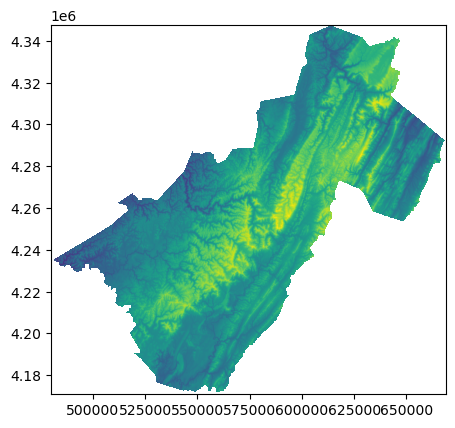

In [ ]:
import matplotlib.pyplot as plt

with rasterio.open('elev.tif') as dataset:
    plot.show(dataset)


### Task 5

The below creates a histogram

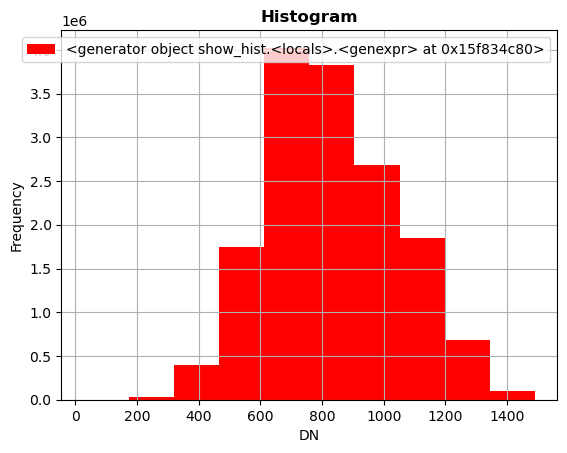

In [27]:
import rasterio.plot as plot

with rasterio.open('elev.tif') as dataset:
    plot.show_hist(dataset)
